In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [4]:
if not os.path.exists("figures"):
    os.mkdir("figures")
figure_path = lambda file_name: os.path.join("figures", file_name)

In [5]:
data = pd.read_pickle("splitted_samples.data")
data.head()

,patient,beat_type,beat_position,waves
0,0,N,189,"[[-0.0004107794277811361, -0.00261239189352849..."
1,0,N,425,"[[-0.00045817705406357484, -0.0030930819806448..."
2,0,N,659,"[[-0.0007267636029973947, -0.00525875376475549..."
3,0,N,889,"[[-0.0006793659767149558, -0.00501505180905132..."
4,0,N,1113,"[[-0.0009953501519312145, -0.00744022475762694..."


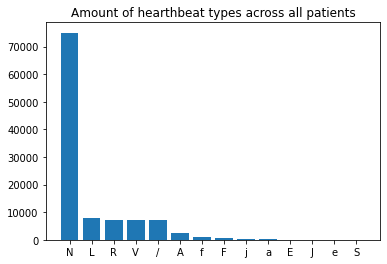

In [6]:
beat_type_counts = data["beat_type"].value_counts()
plt.bar(beat_type_counts.index, beat_type_counts.values)
plt.title("Amount of hearthbeat types across all patients")
plt.savefig(figure_path("heartbeat_types.png"))
plt.show()

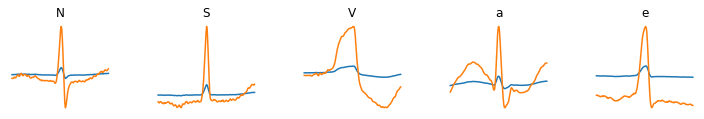

In [12]:
hearthbeats = data.groupby(["beat_type"]).first().reset_index()
hearthbeats = hearthbeats[hearthbeats["waves"].str.len() == 160].reset_index().iloc[6:11].reset_index()

plt.figure(figsize=(10,2))
for i, beat in hearthbeats.iterrows():
    plt.subplot(1,5,i+1)
    plt.tight_layout()
    plt.axis('off')
    plt.title(beat["beat_type"])
    plt.plot(beat["waves"])
plt.savefig("figures/heartbeats.png")

In [8]:
hearthbeats

,level_0,index,beat_type,patient,beat_position,waves
0,6,6,N,0,189,"[[-0.0004107794277811361, -0.00261239189352849..."
1,7,8,S,9,385263,"[[-0.0006161691416717042, -0.00421087320236778..."
2,8,9,V,0,282126,"[[-0.00042657863654194903, -0.0028568843692916..."
3,9,10,a,4,536010,"[[-0.0009321533168879626, -0.00643065643705282..."
4,10,11,e,41,43415,"[[-0.0016747161286461702, -0.01313464254339322..."
